# Mathematical pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sin
from scipy.integrate import solve_ivp
from scipy.special import ellipk

### Equations of motion

$$
\mathcal{H} = \dfrac{1}{2}p^2 + 2 \sin^2 \dfrac{\theta}{2}
$$

$$
\begin{matrix}
\dot{\theta} & = & p \\
\dot{p} & = & - \sin\theta
\end{matrix}
$$

In [2]:
def dfunc(t, x):
    res = np.zeros_like(x)
    res[0] = x[1]
    res[1] = -sin(x[0]) 
    return res

### Initial conditions

In [3]:
theta_0 = np.radians(90)
p_0 = 0

### Period of librations

$$
T = 4 \mathrm{K}(k) \qquad  k^2 = \dfrac{E_0}{2}
$$

In [4]:
N = 120 # Number of points over a period

E_0 = p_0**2/2 + 2*sin(theta_0/2)**2
t_max = 4*ellipk(E_0/2)
dt = t_max/N
t = np.arange(0, t_max, dt)

### Libration frequency

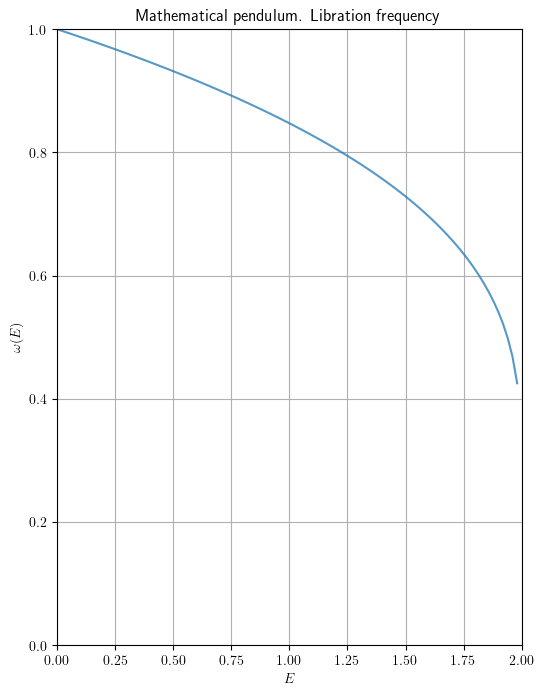

In [5]:
energy = np.arange(0, 2, 0.02)
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(6, 8))
plt.title("Mathematical pendulum. Libration frequency")
plt.xlabel(r"$E$")
plt.ylabel(r"$\omega(E)$")
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.grid(True)
plt.plot(energy, np.pi/(2*ellipk(energy/2)), alpha=0.75)

### Numerical solution

In [6]:
sol = solve_ivp(dfunc, t[[0, -1]], [theta_0, p_0], method="Radau", t_eval=t)

### Phase space

Text(-1.5550572341076383, 1.452148244647691, '$E$ = 1.0 \\\\ $T$ = 7.4163')

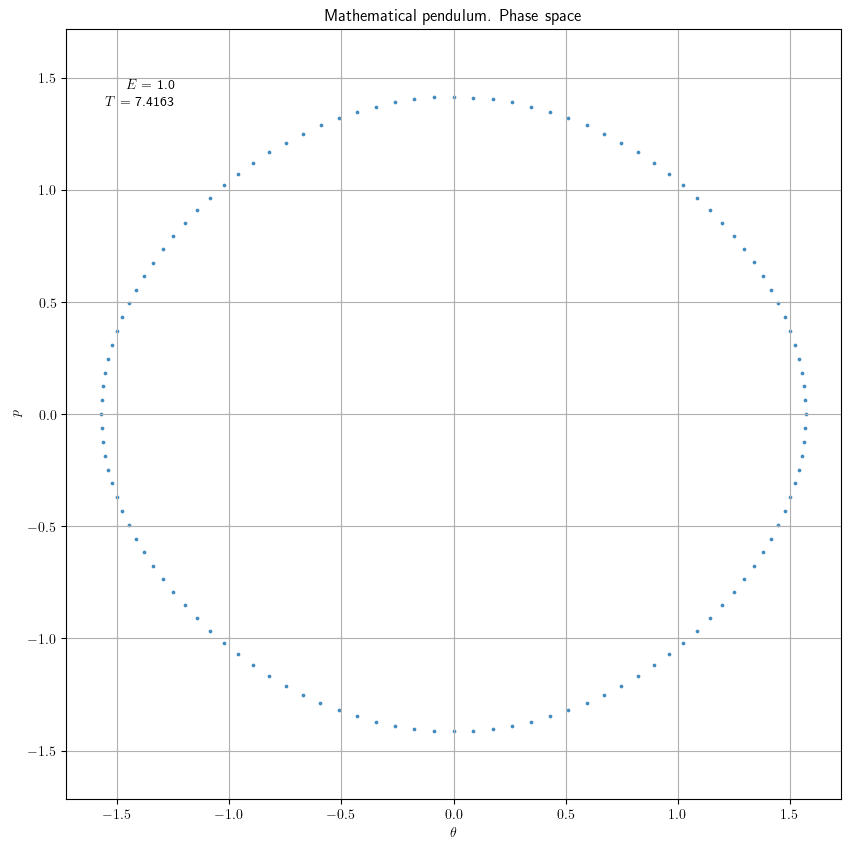

In [7]:
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(10, 10))
plt.title("Mathematical pendulum. Phase space")
plt.axis("equal")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p$")
plt.grid(True)
plt.scatter(sol.y[0], sol.y[1], s=3, alpha=0.75)
xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmin + 0.05*(xmax - xmin), ymax - 0.03*(xmax - xmin), r"$E$ = {} \\ $T$ = {}".format(E_0.round(4), t_max.round(4)))